# Task

You’ve been hired as a data analyst for the National Economic Policy Institute, a research organization focused on understanding income inequality and economic trends. Recently, the institute has been analyzing census data to gain deeper insights into factors that influence an individual’s income level. They are particularly interested in identifying the characteristics that predict whether a person’s annual income exceeds $50,000, which is considered a key threshold for middle-class status in many regions.

The institute believes that by understanding the social, demographic, and economic factors behind income differences, they can provide recommendations to policymakers on how to address inequality and create more opportunities for individuals to move into higher income brackets.

#Importing and checking database

##Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics

##Import dataset from folder

In [4]:
raw_dataset = pd.read_csv("/content/adult.csv")
raw_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## What are the data types ?

In [5]:
raw_dataset.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


## Do we have any missing data?

In [6]:
raw_dataset.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


##How many earn more than 50k ? Are the labels balanced ?

In [7]:
raw_dataset.salary.value_counts()

,count
salary,
<=50K,24720
>50K,7841


#Modifying dataset values and removing unnecessary columns

## Which features could be encoded ?

In [8]:
raw_dataset.describe(exclude=np.number)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [9]:
# Create new dataset for encoding
encoded_dataset = raw_dataset.copy()

###Transforming workclass values into numbers

In [10]:
# Create a mapping for workclass values to integers
workclass_mapping = {
    'State-gov': 0,
    'Self-emp-not-inc': 1,
    'Private': 2,
    'Federal-gov': 3,
    'Local-gov': 4,
    'Self-emp-inc': 5,
    'Without-pay': 6,
    'Never-worked': 7
}

# Apply the mapping to the 'workclass' column
encoded_dataset['workclass'] = encoded_dataset['workclass'].map(workclass_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['workclass'] = encoded_dataset['workclass'].fillna(-1).astype(int)

# Print the transformed 'workclass' column
print(encoded_dataset['workclass'])

0        0
1        1
2        2
3        2
4        2
        ..
32556    2
32557    2
32558    2
32559    2
32560    5
Name: workclass, Length: 32561, dtype: int64


###Transforming education values into numbers

In [11]:
# Create a mapping for education values to integers
education_mapping = {
    'HS-grad': 0,
    'Some-college': 1,
    'Bachelors': 2,
    'Masters': 3,
    'Assoc-voc': 4,
    '11th': 5,
    'Assoc-acdm': 6,
    '10th': 7,
    '7th-8th': 8,
    'Prof-school': 9,
    '9th': 10,
    '12th': 11,
    'Doctorate': 12,
    '5th-6th': 13,
    '1st-4th': 14,
    'Preschool': 15
}

# Apply the mapping to the 'education' column
encoded_dataset['education'] = encoded_dataset['education'].map(education_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['education'] = encoded_dataset['education'].fillna(-1).astype(int)

# Print the transformed 'education' column
print(encoded_dataset['education'])

0        2
1        2
2        0
3        5
4        2
        ..
32556    6
32557    0
32558    0
32559    0
32560    0
Name: education, Length: 32561, dtype: int64


###Transforming martial-status values into numbers

In [12]:
# Create a mapping for marital-status values to integers
marital_status_mapping = {
    'Married-civ-spouse': 0,
    'Divorced': 1,
    'Never-married': 2,
    'Separated': 3,
    'Widowed': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
}

# Apply the mapping to the 'marital-status' column
encoded_dataset['marital-status'] = encoded_dataset['marital-status'].map(marital_status_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['marital-status'] = encoded_dataset['marital-status'].fillna(-1).astype(int)

# Print the transformed 'marital-status' column
print(encoded_dataset['marital-status'])

0        2
1        0
2        1
3        0
4        0
        ..
32556    0
32557    0
32558    4
32559    2
32560    0
Name: marital-status, Length: 32561, dtype: int64


###Transforming occupation values into numbers

In [13]:
# Create a mapping for occupation values to integers
occupation_mapping = {
    'Adm-clerical': 0,
    'Exec-managerial': 1,
    'Handlers-cleaners': 2,
    'Prof-specialty': 3,
    'Other-service': 4,
    'Sales': 5,
    'Craft-repair': 6,
    'Transport-moving': 7,
    'Farming-fishing': 8,
    'Machine-op-inspct': 9,
    'Tech-support': 10,
    'Protective-serv': 11,
    'Armed-Forces': 12,
    'Priv-house-serv': 13
}

# Apply the mapping to the 'occupation' column
encoded_dataset['occupation'] = encoded_dataset['occupation'].map(occupation_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['occupation'] = encoded_dataset['occupation'].fillna(-1).astype(int)

# Print the transformed 'occupation' column
print(encoded_dataset['occupation'])

0         0
1         1
2         2
3         2
4         3
         ..
32556    10
32557     9
32558     0
32559     0
32560     1
Name: occupation, Length: 32561, dtype: int64


###Transforming relashionship values into numbers

In [14]:
# Create a mapping for relationship values to integers
relationship_mapping = {
    'Not-in-family': 0,
    'Husband': 1,
    'Wife': 2,
    'Own-child': 3,
    'Unmarried': 4,
    'Other-relative': 5
}

# Apply the mapping to the 'relationship' column
encoded_dataset['relationship'] = encoded_dataset['relationship'].map(relationship_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['relationship'] = encoded_dataset['relationship'].fillna(-1).astype(int)

# Print the transformed 'relationship' column
print(encoded_dataset['relationship'])

0        0
1        1
2        0
3        1
4        2
        ..
32556    2
32557    1
32558    4
32559    3
32560    2
Name: relationship, Length: 32561, dtype: int64


###Transforming race values into numbers

In [15]:
# Create a mapping for race values to integers
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
}

# Apply the mapping to the 'race' column
encoded_dataset['race'] = encoded_dataset['race'].map(race_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['race'] = encoded_dataset['race'].fillna(-1).astype(int)

# Print the transformed 'race' column
print(encoded_dataset['race'])

0        0
1        0
2        0
3        1
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: race, Length: 32561, dtype: int64


###Transforming sex values into numbers

In [16]:
# Create a mapping for sex values to integers
sex_mapping = {
    'Male': 0,
    'Female': 1
}

# Apply the mapping to the 'sex' column
encoded_dataset['sex'] = encoded_dataset['sex'].map(sex_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['sex'] = encoded_dataset['sex'].fillna(-1).astype(int)

# Print the transformed 'sex' column
print(encoded_dataset['sex'])

0        0
1        0
2        0
3        0
4        1
        ..
32556    1
32557    0
32558    1
32559    0
32560    1
Name: sex, Length: 32561, dtype: int64


###Transforming native-country values into numbers

In [17]:
# Create a mapping for native-country values to integers
native_country_mapping = {
    'United-States': 0,
    'Mexico': 1,
    'Philippines': 2,
    'Germany': 3,
    'Puerto-Rico': 4,
    'Canada': 5,
    'El-Salvador': 6,
    'India': 7,
    'Cuba': 8,
    'England': 9,
    'China': 10,
    'South': 11,
    'Jamaica': 12,
    'Italy': 13,
    'Dominican-Republic': 14,
    'Japan': 15,
    'Guatemala': 16,
    'Poland': 17,
    'Vietnam': 18,
    'Columbia': 19,
    'Haiti': 20,
    'Portugal': 21,
    'Taiwan': 22,
    'Iran': 23,
    'Greece': 24,
    'Nicaragua': 25,
    'Peru': 26,
    'Ecuador': 27,
    'France': 28,
    'Ireland': 29,
    'Hong': 30,
    'Trinadad&Tobago': 31,
    'Cambodia': 32,
    'Thailand': 33,
    'Laos': 34,
    'Yugoslavia': 35,
    'Outlying-US(Guam-USVI-etc)': 36,
    'Honduras': 37,
    'Hungary': 38,
    'Scotland': 39,
    'Holand-Netherlands': 40
}

# Apply the mapping to the 'native-country' column
encoded_dataset['native-country'] = encoded_dataset['native-country'].map(native_country_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['native-country'] = encoded_dataset['native-country'].fillna(-1).astype(int)

# Print the transformed 'native-country' column
print(encoded_dataset['native-country'])

0        0
1        0
2        0
3        0
4        8
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country, Length: 32561, dtype: int64


###Transforming salary values into numbers

In [18]:
# prompt: ###Transforming native-country values into numbers

# Create a mapping for salary values to integers
salary_mapping = {
    '<=50K': 0,
    '>50K': 1
}

# Apply the mapping to the 'salary' column
encoded_dataset['salary'] = encoded_dataset['salary'].map(salary_mapping)

# Fill NaN values with a specific integer and convert float to int
encoded_dataset['salary'] = encoded_dataset['salary'].fillna(-1).astype(int)

# Print the transformed 'salary' column
print(encoded_dataset['salary'])

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64


###Checking data

In [19]:
encoded_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,77516,2,13,2,0,0,0,0,2174,0,40,0,0
1,50,1,83311,2,13,0,1,1,0,0,0,0,13,0,0
2,38,2,215646,0,9,1,2,0,0,0,0,0,40,0,0
3,53,2,234721,5,7,0,2,1,1,0,0,0,40,0,0
4,28,2,338409,2,13,0,3,2,1,1,0,0,40,8,0


In [20]:
encoded_dataset.dtypes

,0
age,int64
workclass,int64
fnlwgt,int64
education,int64
education-num,int64
marital-status,int64
occupation,int64
relationship,int64
race,int64
sex,int64


##Which features need a different distribution ?

In [21]:
encoded_dataset['age'] = sklearn.preprocessing.minmax_scale(encoded_dataset.age)
encoded_dataset['workclass'] = sklearn.preprocessing.minmax_scale(encoded_dataset.workclass)
encoded_dataset['fnlwgt'] = sklearn.preprocessing.minmax_scale(encoded_dataset.fnlwgt)
encoded_dataset['education'] = sklearn.preprocessing.minmax_scale(encoded_dataset.education)
encoded_dataset['education-num'] = sklearn.preprocessing.minmax_scale(encoded_dataset["education-num"])
encoded_dataset['marital-status'] = sklearn.preprocessing.minmax_scale(encoded_dataset["marital-status"])
encoded_dataset['occupation'] = sklearn.preprocessing.minmax_scale(encoded_dataset.occupation)
encoded_dataset['relationship'] = sklearn.preprocessing.minmax_scale(encoded_dataset.relationship)
encoded_dataset['race'] = sklearn.preprocessing.minmax_scale(encoded_dataset.race)
encoded_dataset['sex'] = sklearn.preprocessing.minmax_scale(encoded_dataset.sex)
encoded_dataset['capital-gain'] = sklearn.preprocessing.minmax_scale(encoded_dataset["capital-gain"])
encoded_dataset['capital-loss'] = sklearn.preprocessing.minmax_scale(encoded_dataset["capital-loss"])
encoded_dataset['hours-per-week'] = sklearn.preprocessing.minmax_scale(encoded_dataset["hours-per-week"])
encoded_dataset['native-country'] = sklearn.preprocessing.minmax_scale(encoded_dataset["native-country"])
encoded_dataset['salary'] = sklearn.preprocessing.minmax_scale(encoded_dataset.salary)

##Which features can be removed ?

All features are relavent at the momment because none are unique

#Clustering

##Choosing the number of clusters

In [22]:
X = encoded_dataset.values

clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
clustering_scores_dataset = pd.DataFrame.from_dict(clustering_scores, orient='columns')
clustering_scores_dataset = clustering_scores_dataset.set_index('k')

clustering_scores_dataset

,sse,silhouette
k,,
2,18561.449866,0.309119
3,12337.133650,0.379445
4,11580.513443,0.299971
5,10484.161059,0.281927
6,9509.315155,0.293826
7,9261.058970,0.281178
8,8202.417280,0.262150
9,7997.209916,0.263328
10,7661.107533,0.226511


###SSE


<Axes: xlabel='k', ylabel='sse'>

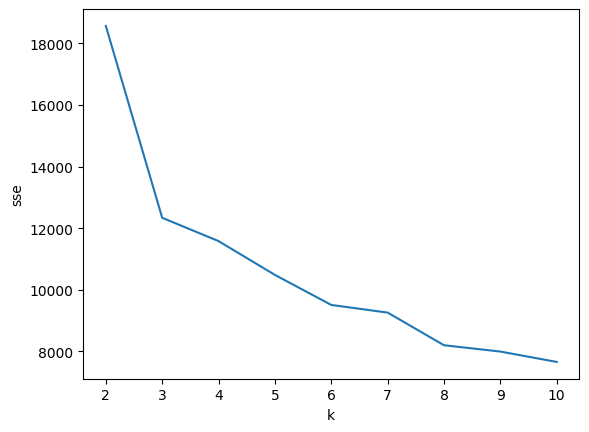

In [23]:
sns.lineplot(data = clustering_scores_dataset, y='sse', x='k')

based on the elbow method, k should be 3

###Silhouette score

<Axes: xlabel='k', ylabel='silhouette'>

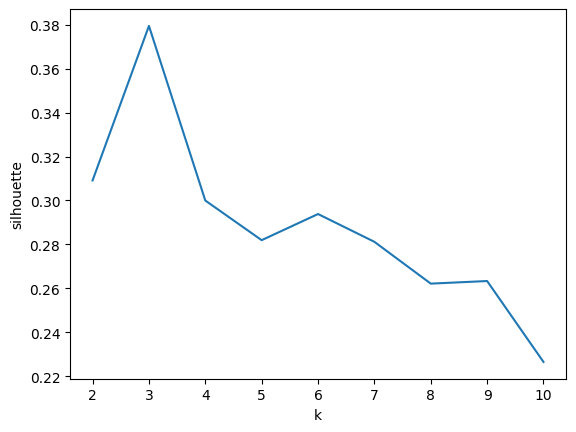

In [24]:
sns.lineplot(data = clustering_scores_dataset, y='silhouette', x='k')

based on the silhouette score, k should be 3

As such, we will take k=3

##Clustering

In [25]:
clustering = sklearn.cluster.KMeans(n_clusters=3, random_state=13)
clustering.fit(X)

KMeans(n_clusters=3, random_state=13)

###checking cluster sizes

In [26]:
pd.Series(clustering.labels_).value_counts()

,count
0,15128
2,9647
1,7786


###Exploring clusters

In [27]:
raw_dataset['cluster_id'] = clustering.labels_
raw_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,cluster_id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,2


<Axes: xlabel='cluster_id', ylabel='count'>

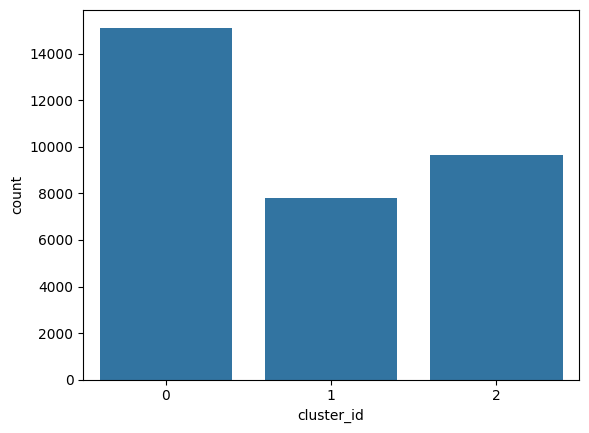

In [28]:
sns.countplot(data=raw_dataset, x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='age'>

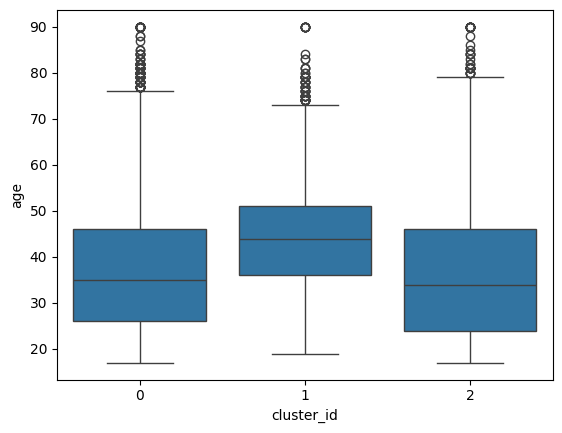

In [29]:
sns.boxplot(data=raw_dataset, y='age', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='count'>

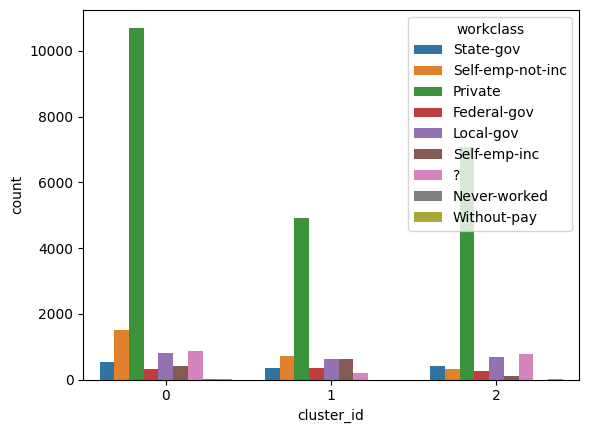

In [30]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='workclass')

<Axes: xlabel='cluster_id', ylabel='fnlwgt'>

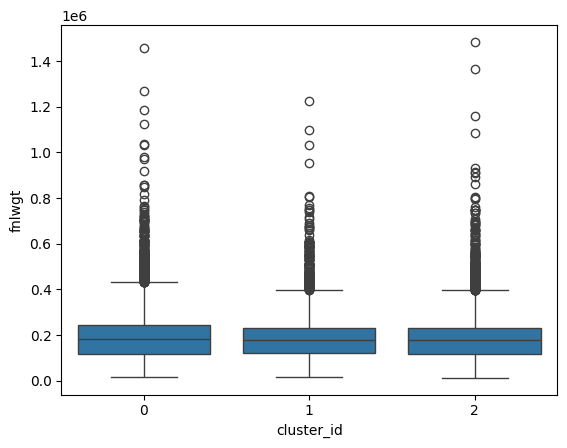

In [31]:
sns.boxplot(data=raw_dataset, y='fnlwgt', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='count'>

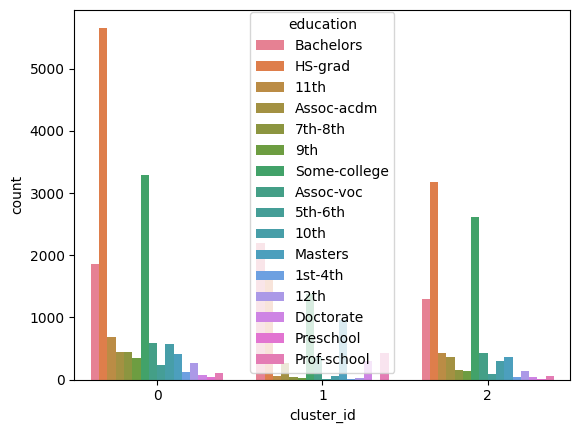

In [32]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='education')

<Axes: xlabel='cluster_id', ylabel='count'>

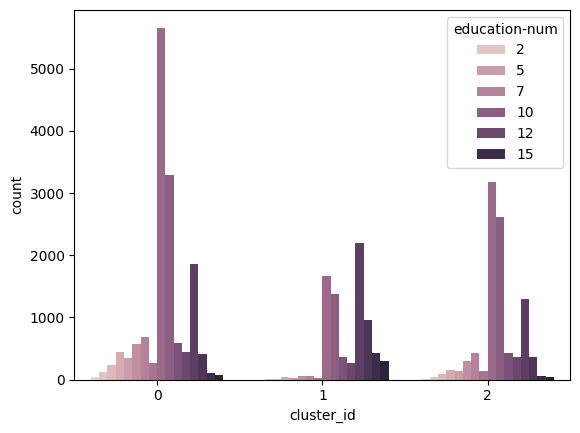

In [33]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='education-num')

<Axes: xlabel='cluster_id', ylabel='count'>

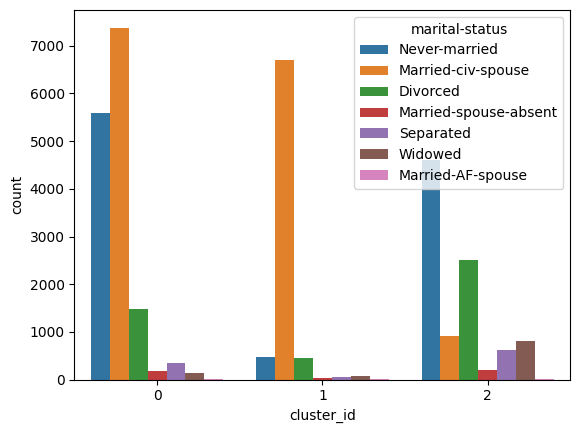

In [34]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='marital-status')

<Axes: xlabel='cluster_id', ylabel='count'>

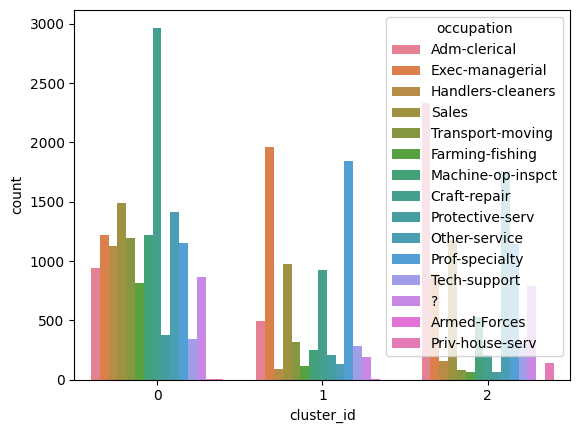

In [35]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='occupation')

<Axes: xlabel='cluster_id', ylabel='count'>

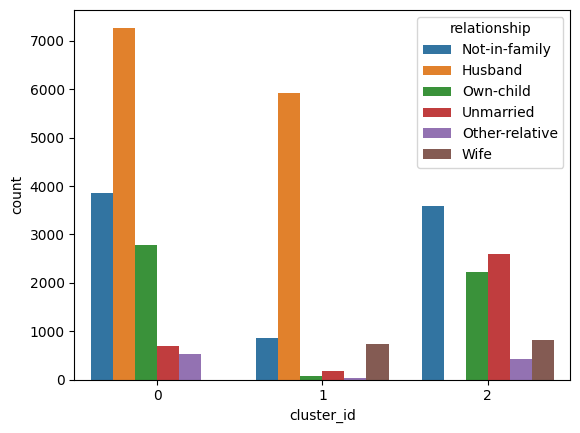

In [36]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='relationship')

<Axes: xlabel='cluster_id', ylabel='count'>

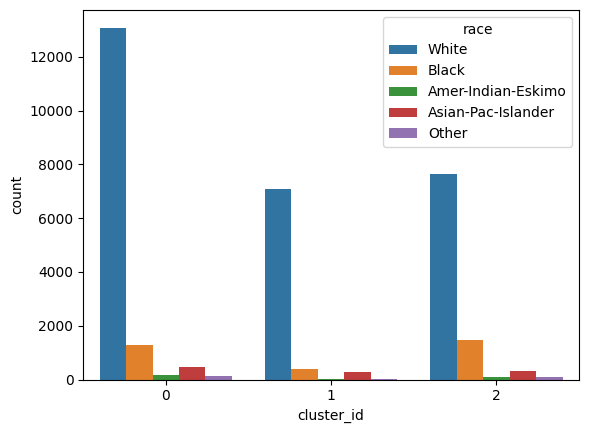

In [37]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='race')

<Axes: xlabel='cluster_id', ylabel='count'>

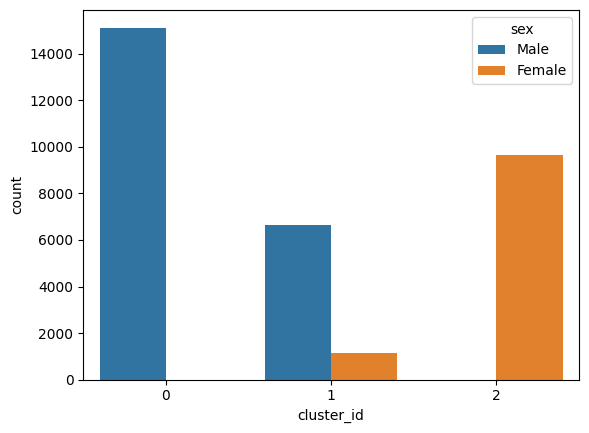

In [38]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='sex')

<Axes: xlabel='cluster_id', ylabel='capital-gain'>

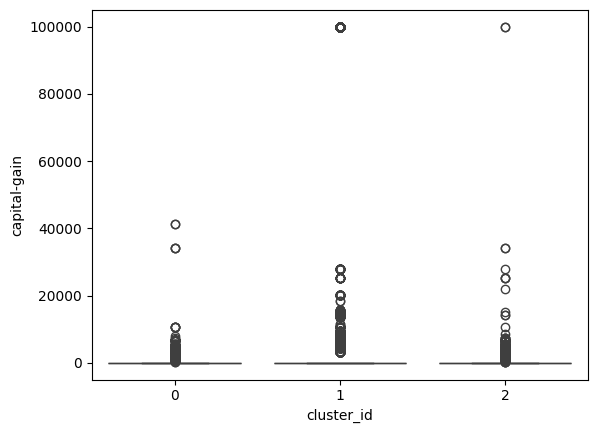

In [39]:
sns.boxplot(data=raw_dataset, y='capital-gain', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='capital-loss'>

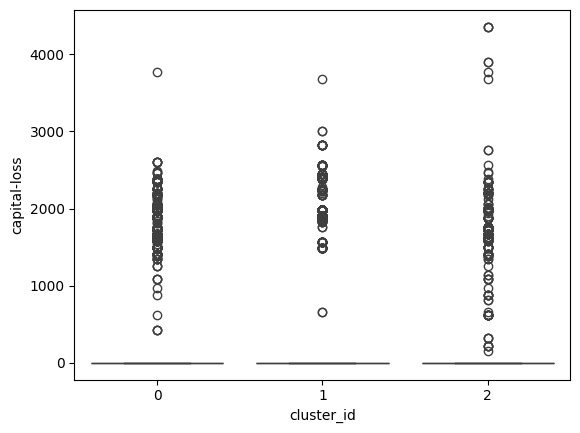

In [40]:
sns.boxplot(data=raw_dataset, y='capital-loss', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='hours-per-week'>

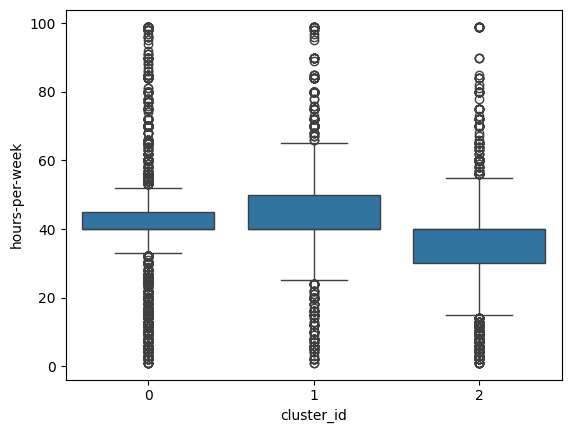

In [41]:
sns.boxplot(data=raw_dataset, y='hours-per-week', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='count'>

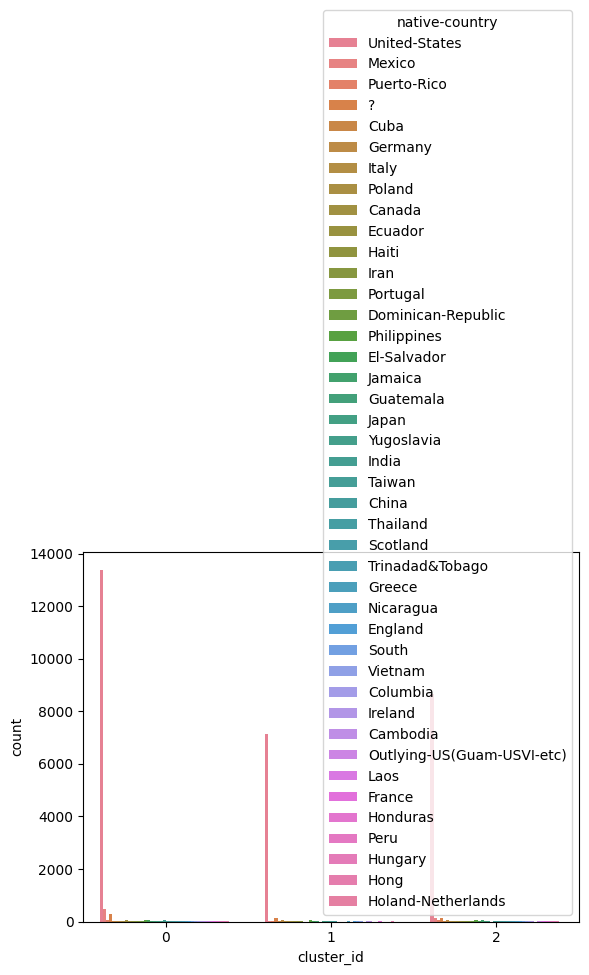

In [42]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='native-country')

<Axes: xlabel='cluster_id', ylabel='count'>

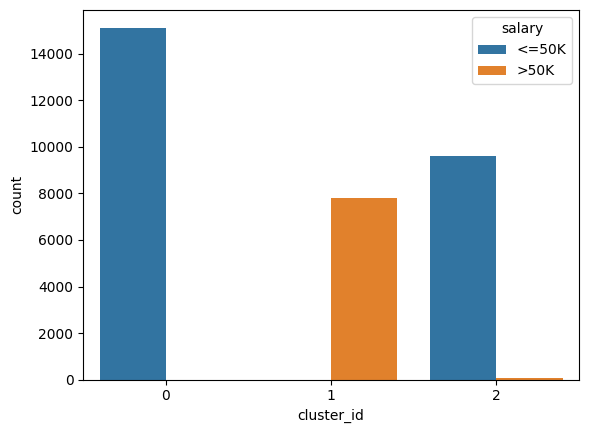

In [43]:
sns.countplot(data=raw_dataset, x='cluster_id', hue='salary')

to be rich, you need to be a male, married, white, americain, well educated, have high-ranking jobs